## gender.csv

In [2]:
import csv

f = open('../Data/gender.csv', encoding='euc_kr')
data = csv.reader(f)
header = next(data)

for i in range(len(header)):
    print('[{0:4d}]: {1}'.format(i, header[i]), end=', ')

    if (i+1)%5==0:
        print()

f.close()

[   0]: 행정구역, [   1]: 2022년06월_계_총인구수, [   2]: 2022년06월_계_연령구간인구수, [   3]: 2022년06월_계_0세, [   4]: 2022년06월_계_1세, 
[   5]: 2022년06월_계_2세, [   6]: 2022년06월_계_3세, [   7]: 2022년06월_계_4세, [   8]: 2022년06월_계_5세, [   9]: 2022년06월_계_6세, 
[  10]: 2022년06월_계_7세, [  11]: 2022년06월_계_8세, [  12]: 2022년06월_계_9세, [  13]: 2022년06월_계_10세, [  14]: 2022년06월_계_11세, 
[  15]: 2022년06월_계_12세, [  16]: 2022년06월_계_13세, [  17]: 2022년06월_계_14세, [  18]: 2022년06월_계_15세, [  19]: 2022년06월_계_16세, 
[  20]: 2022년06월_계_17세, [  21]: 2022년06월_계_18세, [  22]: 2022년06월_계_19세, [  23]: 2022년06월_계_20세, [  24]: 2022년06월_계_21세, 
[  25]: 2022년06월_계_22세, [  26]: 2022년06월_계_23세, [  27]: 2022년06월_계_24세, [  28]: 2022년06월_계_25세, [  29]: 2022년06월_계_26세, 
[  30]: 2022년06월_계_27세, [  31]: 2022년06월_계_28세, [  32]: 2022년06월_계_29세, [  33]: 2022년06월_계_30세, [  34]: 2022년06월_계_31세, 
[  35]: 2022년06월_계_32세, [  36]: 2022년06월_계_33세, [  37]: 2022년06월_계_34세, [  38]: 2022년06월_계_35세, [  39]: 2022년06월_계_36세, 
[  40]: 2022년06월_계_37세, [  41]: 2022년06월_계_38세,

## 연령별 성별 데이터 시각화

In [26]:
import csv
import matplotlib.pyplot as plt
import platform

# 특정 지역의 인구 현황을 화면에 출력
def print_population(population):
    for i in range(len(population)):
        print('{0:3d}세: {1:4d}명'.format(i, population[i]), end=' ')
        if (i + 1) % 10 == 0:
            print()
    print()

# 그래프
def draw_geneder_population(male_num_list, female_num_list):
    
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')

    plt.barh(range(len(male_num_list)), male_num_list, label='남성')
    plt.barh(range(len(female_num_list)), female_num_list, label='여성')

    plt.rcParams['axes.unicode_minus'] = False   # (-)깨짐방지
    plt.legend()
    plt.show()

# 메인함수
def calculate_population():
    f = open('../Data/gender.csv', encoding='euc_kr')
    data = csv.reader(f)
    male_num_list = []
    female_num_list = []

    district = input('지역(동) 이름을 입력하세요: ')
    
    for row in data:
        if district in row[0]:
            
            for male in row[106:207]:            # 남성 연령별 인구수 구간[106:206]
                
                if ',' in male:
                    male = male.replace(',', '') # 천단위 콤마 제거
                male_num_list.append(int(male))

            for female in row[209:310]:          # 여성 연령별 인구수 구간[209:309]
                
                if ',' in female:
                    female = female.replace(',', '')
                female_num_list.append(int(female))

    f.close()

    print('남성 총인구수: ', sum(male_num_list))
    print_population(male_num_list)
    print('-------------------------------')
    print('여성 총인구수: ', sum(female_num_list))
    print_population(female_num_list)
    draw_geneder_population(male_num_list, female_num_list)


In [ ]:
# 기능 구현
calculate_population()


## 연령별 성별 데이터 시각화 : 항아리모양
 - 여성데이터 오른쪽, 남성데이터 왼쪽 표시

In [28]:
# 메인함수 (남녀 대칭)
def calculate_population():
    f = open('../Data/gender.csv', encoding='euc_kr')
    data = csv.reader(f)
    male_num_list = []
    female_num_list = []

    district = input('지역(동) 이름을 입력하세요: ')
    
    for row in data:
        if district in row[0]:
            
            for male in row[106:207]:            # 남성 연령별 인구수 구간[106:206]
                
                if ',' in male:
                    male = male.replace(',', '') # 천단위 콤마 제거
                male_num_list.append(-int(male))
                                  # 남녀 대칭위해 음수로 저장

            for female in row[209:310]:          # 여성 연령별 인구수 구간[209:309]
                
                if ',' in female:
                    female = female.replace(',', '')
                female_num_list.append(int(female))
            
    f.close()

    draw_geneder_population(male_num_list, female_num_list)

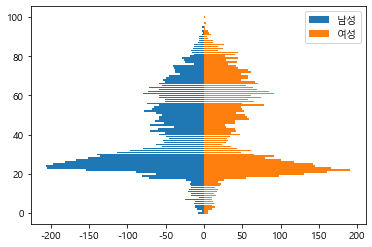

In [29]:
# 기능 구현
calculate_population()

## 제주도 남녀 인구 비율

제주 남자 인구수: 339,697명, 여자 인구수: 338,315명


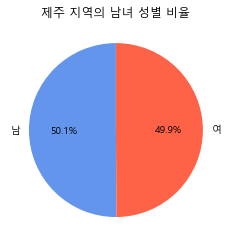

In [31]:
import csv
import matplotlib.pyplot as plt
import platform

f = open('../Data/gender.csv', encoding='euc_kr')
data = csv.reader(f)
population=[]                # Pie chart에 넣을 데이터 (남, 여 인구수)

city = input('찾고 싶은 지역의 이름을 입력하세요: ')

male_count = 0
female_count = 0

for row in data:
    if city in row[0]:

        # 자리수 문자열 제거 및 숫자로 변환
        male_count = int(row[104].replace(',', '')) 
        female_count = int(row[207].replace(',', ''))

        # 도시별 하위 목록이 많음. 처음에 나오는 데이터가 전체 총합
        break 

print("{0} 남자 인구수: {1:}명, 여자 인구수: {2}명".format(city, format(male_count, ','),format(female_count, ',')))

population = [male_count, female_count]
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['cornflowerblue', 'tomato']
                                                                        # 파이 차트의 시작각도(90도)
plt.pie(population, labels=['남', '여'], autopct='%.1f%%', colors=color, startangle=90)

plt.title(city + " 지역의 남녀 성별 비율")
plt.show()

## 여러 그래프를 한번에 그리기
 - subplots(행의 수, 열의 수, figsize=(x, y))
   - 전체 subplot의 개수를 설정함
   - figsize: 각 subplot들의 크기
 - subplot(행, 열, index) , axes[행, 열].plot으로 접근
   - index는 1부터 시작함

In [32]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y1 = [0.59705847, 0.25786401, 0.63213726, 0.63287317, 0.73791151]
y2 = [1.19411694, 0.51572803, 1.26427451, 1.26574635, 1.47582302]
y3 = [0.86793828, 0.07563408, 0.67670068, 0.78932712, 0.0043694]
y4 = [0.43396914, 0.03781704, 0.33835034, 0.39466356, 0.0021847]

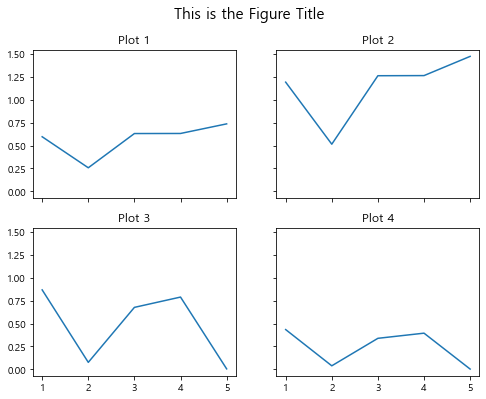

In [33]:
# 방법1
# 전체 subplot의 개수 설정 (2 x 2= 총 4개)
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
                                                # x,y축 tick공유
# 전체 그래프의 타이틀 설정
fig.suptitle('This is the Figure Title', fontsize=15)


# Top Left Subplot
axes[0,0].plot(x, y1)
axes[0,0].set_title("Plot 1")

# Top Right Subplot
axes[0,1].plot(x, y2)
axes[0,1].set_title("Plot 2")

# Bottom Left Subplot
axes[1,0].plot(x, y3)
axes[1,0].set_title("Plot 3")

# Bottom Right Subplot
axes[1,1].plot(x, y4)
axes[1,1].set_title("Plot 4")
plt.show()


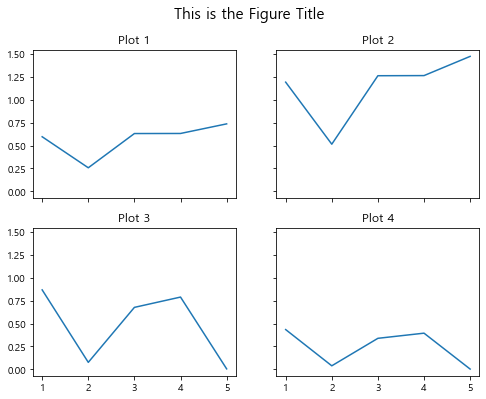

In [37]:
# 방법2

# 전체 subplot의 개수 설정 (2 x 2= 총 4개)
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
                                                # x,y축 tick공유
# 전체 그래프의 타이틀 설정
fig.suptitle('This is the Figure Title', fontsize=15)


# Top Left Subplot
plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title('Plot 1')

# Top Right Subplot
plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title("Plot 2")

# Bottom Left Subplot
plt.subplot(2, 2, 3)
plt.plot(x, y3)
plt.title("Plot 3")

# Bottom Right Subplot
plt.subplot(2, 2, 4)
plt.plot(x, y4)
plt.title("Plot 4")
plt.show()

## 제주도 나이별 인구 현황(꺾은 선 그래프)

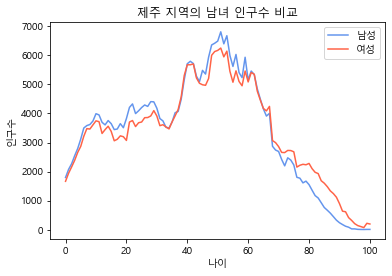

In [53]:
import csv
import matplotlib.pyplot as plt
import platform

f = open('../Data/gender.csv', encoding='euc_kr')
data = csv.reader(f)

city = input('찾고 싶은 지역의 이름을 입력하세요: ')
    
male_list = []
female_list = []

for row in data:
    if city in row[0]:
        for i in range(106, 207):
            male_list.append(int(row[i].replace(',','')))
            female_list.append(int(row[i+103].replace(',','')))
                                # 남녀 인덱스 차이 103
        # 도시별 하위 목록이 많음. 처음에 나오는 데이터가 전체 총합
        break

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

color = ['cornflowerblue', 'tomato']

plt.plot(male_list, label='남성', color=color[0])
plt.plot(female_list, label='여성', color=color[1])
plt.title(city + " 지역의 남녀 인구수 비교")
plt.xlabel('나이')
plt.ylabel('인구수')
plt.legend()
plt.show()


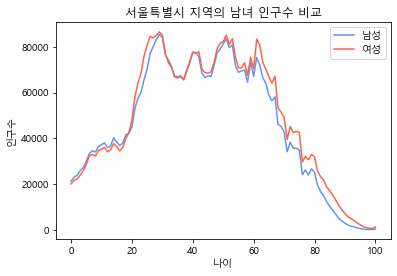

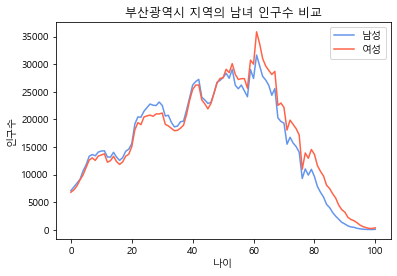

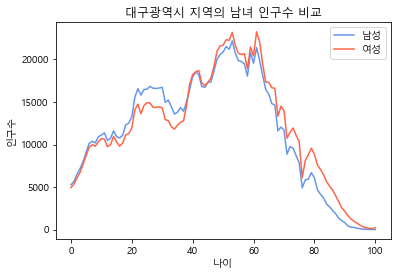

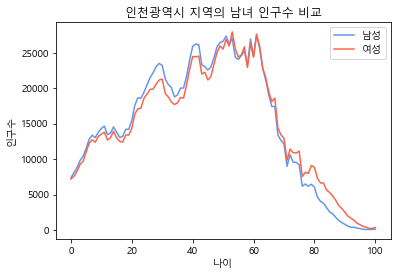

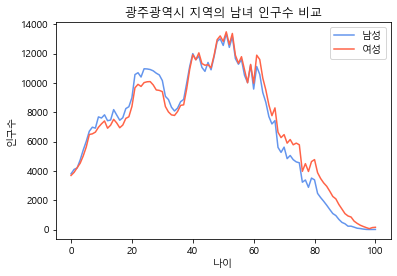

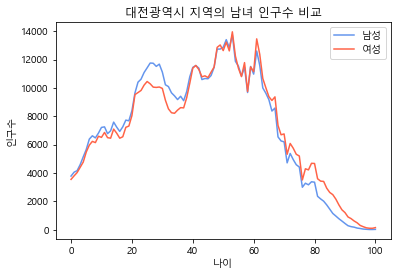

In [54]:
import csv
import matplotlib.pyplot as plt
import platform

f = open('../Data/gender.csv', encoding='euc_kr')
data = csv.reader(f)

# f.seek(0) -> 파일 포인트를 파일의 가장 앞으로 보내는 함수
#           -> 사용하지 않을시 파일에 저장된 순서대로 단어 찾아야 함 

city_list=['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시']

for city in city_list:
    
    male_list = []
    female_list = []

    for row in data:
        if city in row[0]:
            for i in range(106, 207):
                male_list.append(int(row[i].replace(',','')))
                female_list.append(int(row[i+103].replace(',','')))
                                    # 남녀 인덱스 차이 103
            # 도시별 하위 목록이 많음. 처음에 나오는 데이터가 전체 총합
            break

    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')

    color = ['cornflowerblue', 'tomato']

    plt.plot(male_list, label='남성', color=color[0])
    plt.plot(female_list, label='여성', color=color[1])
    plt.title(city + " 지역의 남녀 인구수 비교")
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.legend()
    plt.show()

## 산점도(Scatter)로 표현하기
 - scatter([x축 데이터], [y축 데이터])
 - 산점도
   - 가로축과 세로축을 기준으로 두 요소가 서로 어떤 관계를 맺고 있는지를 파악하기 쉽게 나타낸 그래프
   - x축, y축 상관 관계 표시
   - 각 점들은 오른쪽 컬러바를 참고하여 색깔별로 나이를 표시함
     - 버블의 위치: 남녀 성비
     - 버블의 크기: 연령대별 인구수를 표현
   - 제주도 성별 비율
     - 60대 초중반을 기점으로 남녀 성비가 바뀜을 알 수 있음
 
 

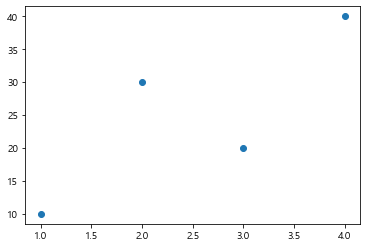

In [55]:
import matplotlib.pyplot as plt

plt.scatter([1, 2, 3, 4], [10, 30, 20, 40])
plt.show()

#### 버블의 크기 표시: s 속성
#### 버블의 색상 변경: c 속성

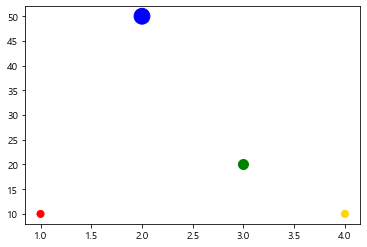

In [57]:
import matplotlib.pyplot as plt

y_value = [10, 50, 20, 10]
x_value = [1, 2, 3, 4]
size = []

for value in y_value:
    size.append(value*5)
    # s(size): 버블의 크기

plt.scatter(x_value, y_value, s=size,
c=['red','blue', 'green', 'gold'])
plt.show()

#### colorbar() : 그래프 우측에 color bar를 추가함
#### scatter() 함수 속성 추가
  - c=range(색상 개수)
    - 각 데이터에 해당하는 color bar의 색으로 정해짐
  - cmap: 컬러맵 속성 사용 (cmap=‘jet’) – 무지개색

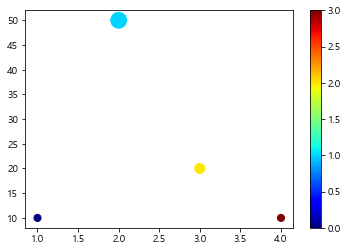

In [68]:
import matplotlib.pyplot as plt
y_value = [10, 50, 20, 10]
x_value = [1, 2, 3, 4]
size = []
for y in y_value:
    size.append(y * 5)
plt.scatter(x_value, y_value, s=size, c=range(4),
cmap='jet')
plt.colorbar()
plt.show()

## 제주도의 연령대별 성별 비율 산점도

In [64]:
import csv
import matplotlib.pyplot as plt
import platform
import math

# 산점도 그리기
def draw_scatter(city, male_list, female_list, bubble_size_list):
    
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        
        plt.rc('font', family='AppleGothic')
    
    plt.figure(figsize = (8, 4), dpi=100)
    plt.scatter(male_list, female_list, s=bubble_size_list, c=range(101),alpha=0.5, cmap='jet')
                                                                       # alpha:투명도

    plt.colorbar()                                        # 추세선 추가
    plt.plot(range(max(male_list)), range(max(male_list)), 'g--') 

    plt.title(city + " 지역의 남녀 인구수 비교")
    plt.xlabel('남성 인구 수')
    plt.ylabel('여성 인구 수')
    plt.show()         

# 메인함수
                                                 
def calculate_population():
    f=open('../Data/gender.csv', encoding='euc_kr')
    data=csv.reader(f)
    
    male_list=[]
    female_list=[]
    
    bubble_size_list=[]
    
    city = input('찾고 싶은 지역의 이름을 입력하세요: ')

    for row in data:
        if city in row[0]:
            for i in range(106, 207):
                male_num = int(row[i].replace(',',''))
                female_num = int(row[i + 103].replace(',',''))

                # 버블의 사이즈 조절 math.sqrt():루트
                bubble_size_list.append(math.sqrt(male_num + female_num))
                # bubble_size_list.append(male_num + female_num) : 사이즈조절x
                
                male_list.append(male_num)
                female_list.append(female_num)
            
            break

    f.close()
    
    draw_scatter(city, male_list, female_list, bubble_size_list)

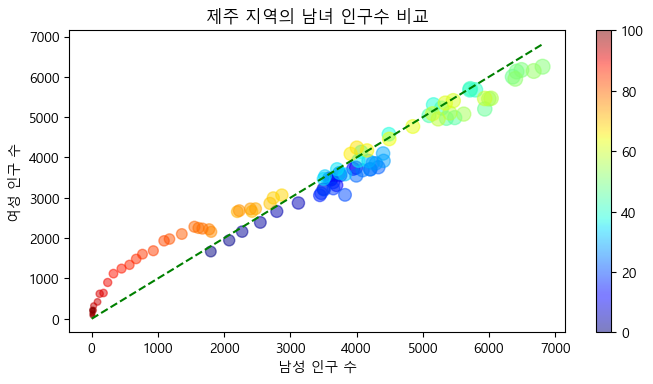

In [65]:
# 기능 구현
calculate_population()